Getting datasets list: 100%|██████████| 214/214 [00:00<00:00, 382.19it/s]
!!! Wrong query or api.insee.fr error !!!
!!! SDMX web service used instead of API !!!
1/1 - Getting series: 100%|██████████| 1/1 [00:00<00:00,  1.07it/s]
Data has been cached



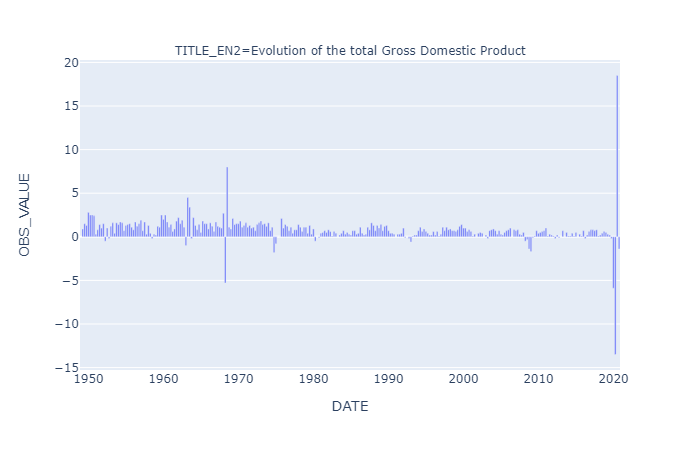

In [1]:

from pynsee.macro import * 
import plotly.express as px
from plotly.offline import plot

import os 
# Beware : any change to the keys should be tested in a new python session
os.environ['insee_key'] = "my_key"
os.environ['insee_secret'] = "my_secret"

# get series key (idbank), for Gross domestic product balance
id = get_idbank_list("CNT-2014-PIB-EQB-RF")

id = id.loc[(id.FREQ == "T") &
            (id.OPERATION == "PIB") &
            (id.NATURE == "TAUX") &
            (id.CORRECTION == "CVS-CJO")]

data = get_insee_idbank(id.idbank)
data = split_title(df = data, n_split=2)
# plot with plotly
fig = px.bar(data, x = data.index, y = "OBS_VALUE",
             facet_col = "TITLE_EN2", facet_col_wrap=5)
fig.update_yaxes(matches=None)
fig.show('png')


